Imports necessary for the notebook to run

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the CSV Files

In [2]:
customer_data = pd.read_csv("Customers.csv")
products_data = pd.read_csv("Products.csv")
Transaction_data = pd.read_csv("Transactions.csv")

In [3]:
customer_data.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [4]:
products_data.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [5]:
Transaction_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


Data Cleaning

In [6]:
customer_data['SignupDate'] = pd.to_datetime(customer_data['SignupDate'])
Transaction_data['TransactionDate'] = pd.to_datetime(Transaction_data['TransactionDate'])

In [7]:
customer_data.describe()

,SignupDate
count,200
mean,2023-07-19 08:31:12
min,2022-01-22 00:00:00
25%,2022-09-26 12:00:00
50%,2023-08-31 12:00:00
75%,2024-04-12 12:00:00
max,2024-12-28 00:00:00


In [8]:
products_data.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [9]:
Transaction_data.describe()

,TransactionDate,Quantity,TotalValue,Price
count,1000,1000.000000,1000.000000,1000.00000
mean,2024-06-23 15:33:02.768999936,2.537000,689.995560,272.55407
min,2023-12-30 15:29:12,1.000000,16.080000,16.08000
25%,2024-03-25 22:05:34.500000,2.000000,295.295000,147.95000
50%,2024-06-26 17:21:52.500000,3.000000,588.880000,299.93000
75%,2024-09-19 14:19:57,4.000000,1011.660000,404.40000
max,2024-12-28 11:00:00,4.000000,1991.040000,497.76000
std,NaN,1.117981,493.144478,140.73639


Customer base of the firm based on region

In [10]:
region_merg = Transaction_data.merge(customer_data, on="CustomerID", how="left")

In [11]:
region_merg.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15


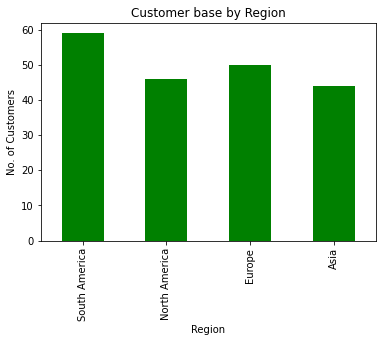

In [12]:
count_region = region_merg.groupby('Region')['CustomerID'].nunique().sort_index(ascending=False)
count_region.plot(kind='bar',title = 'Customer base by Region', color = "green")
plt.ylabel("No. of Customers")
plt.show()

Products generating revenue

In [13]:
prod_merged = Transaction_data.merge(products_data, on="ProductID", how="left")
products = prod_merged.groupby('Category')['TotalValue'].sum().sort_values(ascending=False).head(10)
print(products)
print("Total Revenue :: "+str(prod_merged['TotalValue'].sum()))

Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64
Total Revenue :: 689995.56


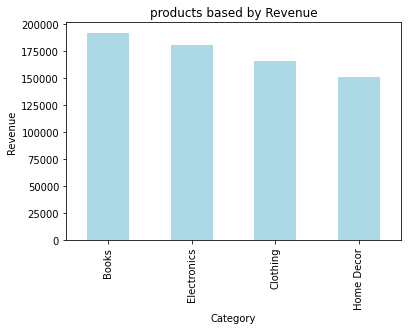

In [14]:
products.plot(kind='bar',title="products based by Revenue", color='lightblue')
plt.ylabel("Revenue")
plt.show()

Revenue Per Region

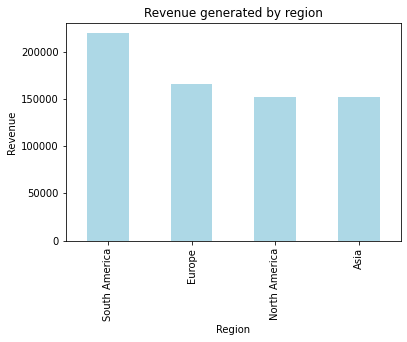

In [15]:
regions = region_merg.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
regions.plot(kind="bar",title="Revenue generated by region",color= "lightblue")
plt.ylabel("Revenue")
plt.show()



Revenue in each month

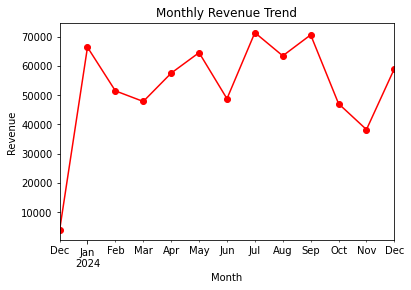

In [16]:
time_data = Transaction_data
time_data['Month'] = Transaction_data['TransactionDate'].dt.to_period('M')
revenue_month = time_data.groupby('Month')['TotalValue'].sum()
revenue_month.plot(title="Monthly Revenue Trend", marker = 'o', color ="red")
plt.ylabel("Revenue")
plt.show()

trend of quantity of products sold over months

['Electronics' 'Clothing' 'Books' 'Home Decor']


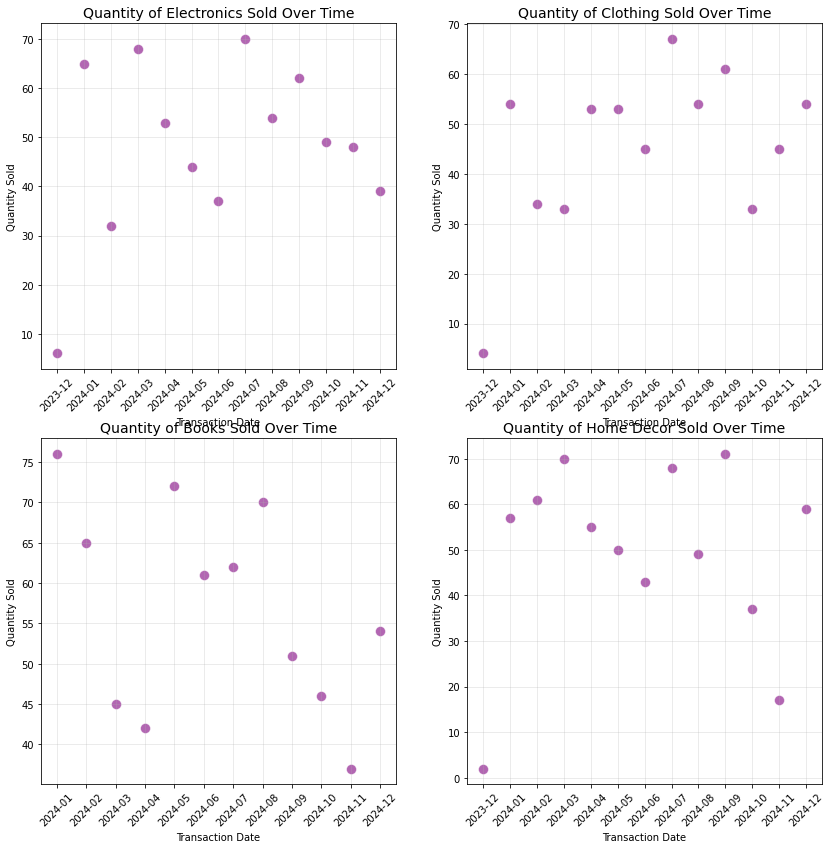

In [17]:
catagories = prod_merged['Category'].unique()
print(catagories)
prod_merged['Month'] = prod_merged['TransactionDate'].dt.to_period('M').astype('str')
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(14,14))
axes = axes.flatten()
for i in range(len(catagories)):
    data = prod_merged[prod_merged['Category'] == catagories[i]]
    date = data.groupby('Month')['Quantity'].sum().reset_index()

    sns.scatterplot(x='Month', y='Quantity',data = date, ax=axes[i], color='purple', s=100, alpha=0.6)
    axes[i].set_title(f"Quantity of {catagories[i]} Sold Over Time", fontsize=14)
    axes[i].set_xlabel("Transaction Date", fontsize=10)
    axes[i].set_ylabel("Quantity Sold", fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(alpha=0.3)




Average spending per product by each regions

<AxesSubplot:title={'center':'Region wise spending per item'}, xlabel='Region'>

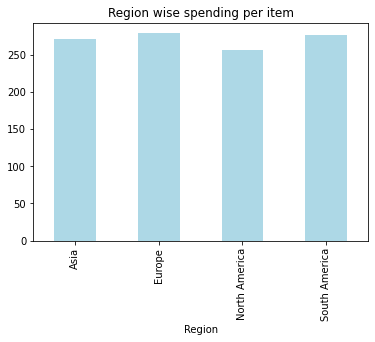

In [18]:
spending = region_merg.groupby("Region")["TotalValue"].sum()
quantity = region_merg.groupby("Region")["Quantity"].sum()
Average_spending = spending/quantity

Average_spending.plot(kind = "bar",title="Region wise spending per item",color = "lightblue")

C:\Users\User\AppData\Local\Temp\ipykernel_19200\3087045863.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=region_merg, x='Region', y='TotalValue', palette='Set3')


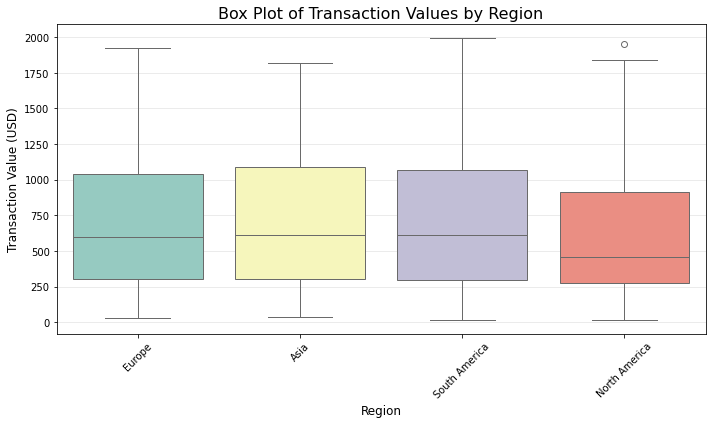

In [20]:
# Box plot for TotalValue by Region
plt.figure(figsize=(10, 6))
sns.boxplot(data=region_merg, x='Region', y='TotalValue', palette='Set3')
plt.title("Box Plot of Transaction Values by Region", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Transaction Value (USD)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


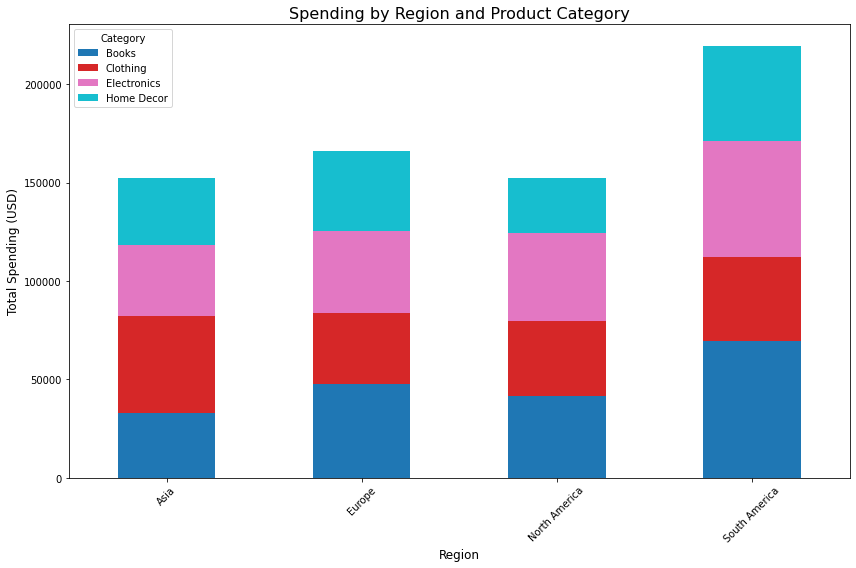

In [21]:
# Pivot table for stacked bar plot
merged_data = prod_merged.merge(customer_data,on="CustomerID",how="left")
data = merged_data.pivot_table(index='Region', columns='Category', values='TotalValue', aggfunc='sum', fill_value=0)

# Plot stacked bar chart
data.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab10')
plt.title("Spending by Region and Product Category", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total Spending (USD)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Category")
plt.tight_layout()
plt.show()


Customer loyality 

In [22]:
customerID1 = set(customer_data['CustomerID'])
customerID2 = set(Transaction_data['CustomerID'])
left_over = customerID1-customerID2
print(str(left_over)+" has never bought a product")

{'C0180'} has never bought a product


# Analysis based on Region

## Asia

### Top performing product Categories in Asia region

In [23]:

prod_merged_asia = Transaction_data.merge(products_data, on="ProductID", how="left")
prod_merged_asia = prod_merged_asia.merge(customer_data, on="CustomerID",how="left")
prod_merged_asia = prod_merged_asia[prod_merged_asia["Region"] == "Asia"]
products_asia = prod_merged_asia.groupby('Category')['TotalValue'].sum().sort_values(ascending=False).head(7)
print(products_asia)
print("Total Revenue :: "+str(prod_merged_asia["TotalValue"].sum()))

Category
Clothing       49353.09
Electronics    35658.15
Home Decor     33944.70
Books          33119.03
Name: TotalValue, dtype: float64
Total Revenue :: 152074.97000000003


In [61]:
prod_merged_asia.groupby(['Category'])['Quantity'].sum()

Category
Books          120
Clothing       166
Electronics    132
Home Decor     142
Name: Quantity, dtype: int64

['Electronics' 'Clothing' 'Books' 'Home Decor']


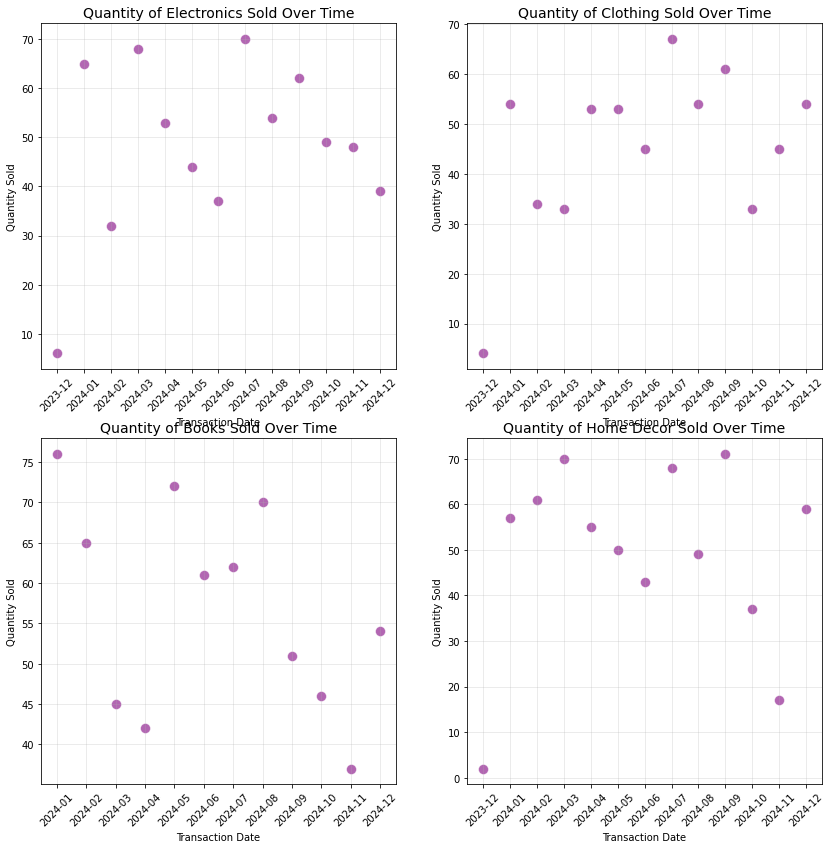

In [26]:
catagories = prod_merged_asia['Category'].unique()
print(catagories)
prod_merged_asia['Month'] = prod_merged_asia['TransactionDate'].dt.to_period('M').astype('str')
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(14,14))
axes = axes.flatten()
for i in range(len(catagories)):
    data = prod_merged[prod_merged['Category'] == catagories[i]]
    date = data.groupby('Month')['Quantity'].sum().reset_index()

    sns.scatterplot(x='Month', y='Quantity',data = date, ax=axes[i], color='purple', s=100, alpha=0.6)
    axes[i].set_title(f"Quantity of {catagories[i]} Sold Over Time", fontsize=14)
    axes[i].set_xlabel("Transaction Date", fontsize=10)
    axes[i].set_ylabel("Quantity Sold", fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(alpha=0.3)


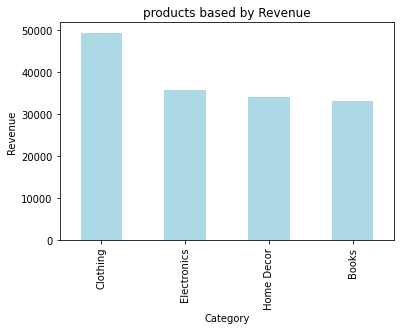

In [128]:
products_asia.plot(kind='bar',title="products based by Revenue", color='lightblue')
plt.ylabel("Revenue")
plt.show()

### Monthly Revenue Trend

In [29]:
time_data_asia = prod_merged_asia
time_data_asia['Month'] = prod_merged_asia['TransactionDate'].dt.to_period('M')
revenue_month_asia = time_data_asia.groupby('Month')['TotalValue'].sum()
print(revenue_month_asia)

Month
2023-12     1585.36
2024-01    19429.97
2024-02     8960.31
2024-03     9875.56
2024-04    10371.77
2024-05    11443.41
2024-06    10267.39
2024-07    19755.79
2024-08    15225.79
2024-09    14652.42
2024-10    10051.99
2024-11     7547.36
2024-12    12907.85
Freq: M, Name: TotalValue, dtype: float64


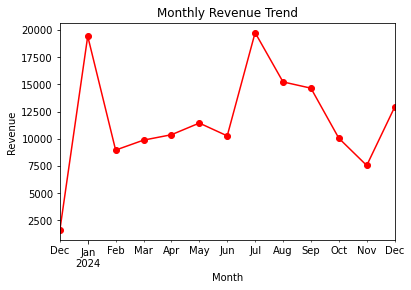

In [30]:

revenue_month_asia.plot(title='Monthly Revenue Trend', marker = 'o', color ="red")
plt.ylabel("Revenue")
plt.show()

## Monthly sales of diffent catagories

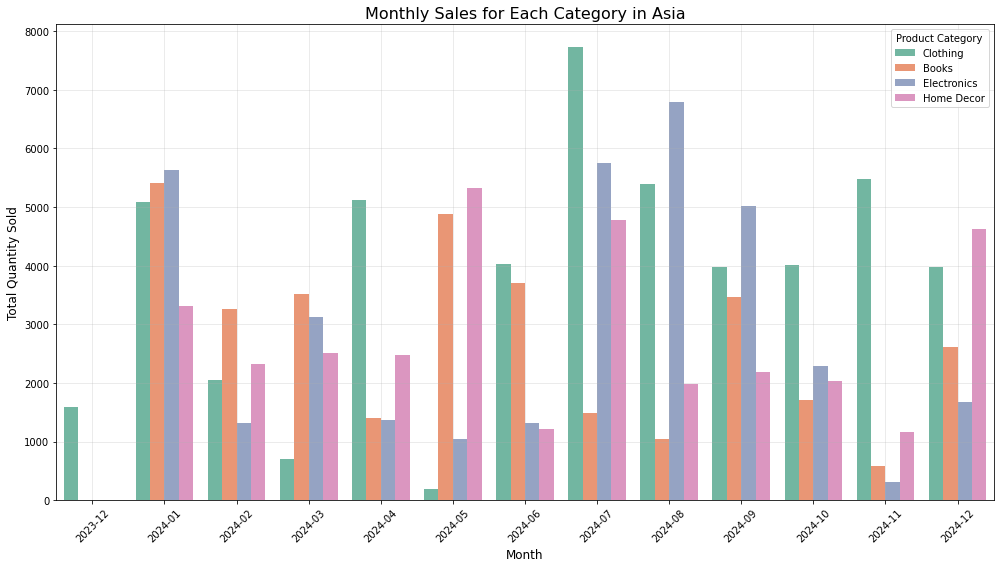

In [31]:
monthly_sales_category = prod_merged_asia.groupby(['Month', 'Category'])['TotalValue'].sum().reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(data=monthly_sales_category, x='Month', y='TotalValue', hue='Category', palette='Set2')
plt.title(f"Monthly Sales for Each Category in Asia", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Quantity Sold", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Product Category")
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()

## South America

### Top performing product Categories in South America region

In [32]:

prod_merged_SA = Transaction_data.merge(products_data, on="ProductID", how="left")
prod_merged_SA = prod_merged_SA.merge(customer_data, on="CustomerID",how="left")
prod_merged_SA = prod_merged_SA[prod_merged_SA["Region"] == "South America"]
products_SA = prod_merged_SA.groupby('Category')['TotalValue'].sum().sort_values(ascending=False).head(7)
print(products_SA)
print("Total Revenue :: "+str(prod_merged_SA["TotalValue"].sum()))

Category
Books          69752.03
Electronics    58846.32
Home Decor     48310.72
Clothing       42443.49
Name: TotalValue, dtype: float64
Total Revenue :: 219352.56


In [62]:
prod_merged_SA.groupby(['Category'])['Quantity'].sum()

Category
Books          241
Clothing       158
Electronics    198
Home Decor     192
Name: Quantity, dtype: int64

['Electronics' 'Books' 'Clothing' 'Home Decor']


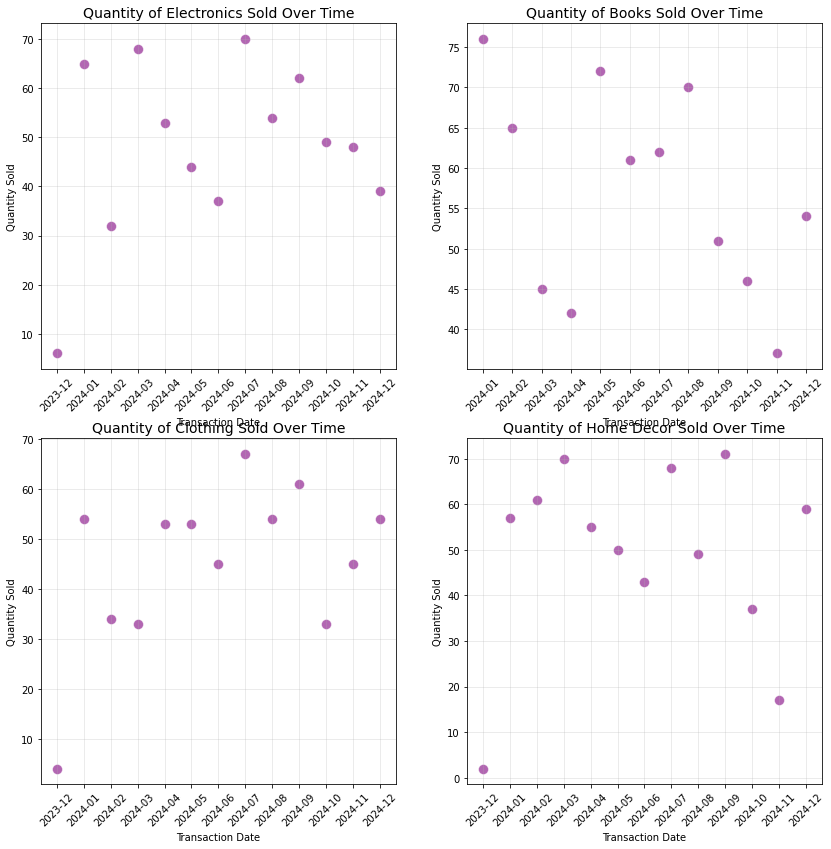

In [33]:
catagories = prod_merged_SA['Category'].unique()
print(catagories)
prod_merged_SA['Month'] = prod_merged_asia['TransactionDate'].dt.to_period('M').astype('str')
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(14,14))
axes = axes.flatten()
for i in range(len(catagories)):
    data = prod_merged[prod_merged['Category'] == catagories[i]]
    date = data.groupby('Month')['Quantity'].sum().reset_index()

    sns.scatterplot(x='Month', y='Quantity',data = date, ax=axes[i], color='purple', s=100, alpha=0.6)
    axes[i].set_title(f"Quantity of {catagories[i]} Sold Over Time", fontsize=14)
    axes[i].set_xlabel("Transaction Date", fontsize=10)
    axes[i].set_ylabel("Quantity Sold", fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(alpha=0.3)


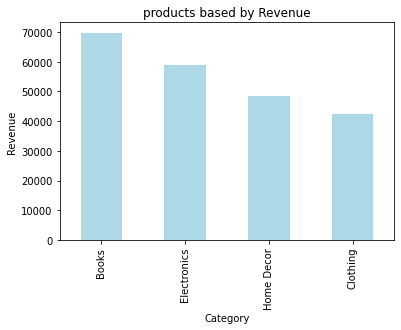

In [34]:
products_SA.plot(kind='bar',title="products based by Revenue", color='lightblue')
plt.ylabel("Revenue")
plt.show()

### Monthly Revenue Trend

In [35]:
time_data_SA = prod_merged_SA
time_data_SA['Month'] = prod_merged_SA['TransactionDate'].dt.to_period('M')
revenue_month_SA = time_data_SA.groupby('Month')['TotalValue'].sum()

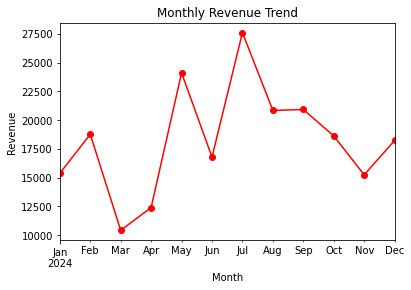

In [36]:
revenue_month_SA.plot(title='Monthly Revenue Trend', marker = 'o', color ="red")
plt.ylabel("Revenue")
plt.show()

### Monthly sales trends of different catagores

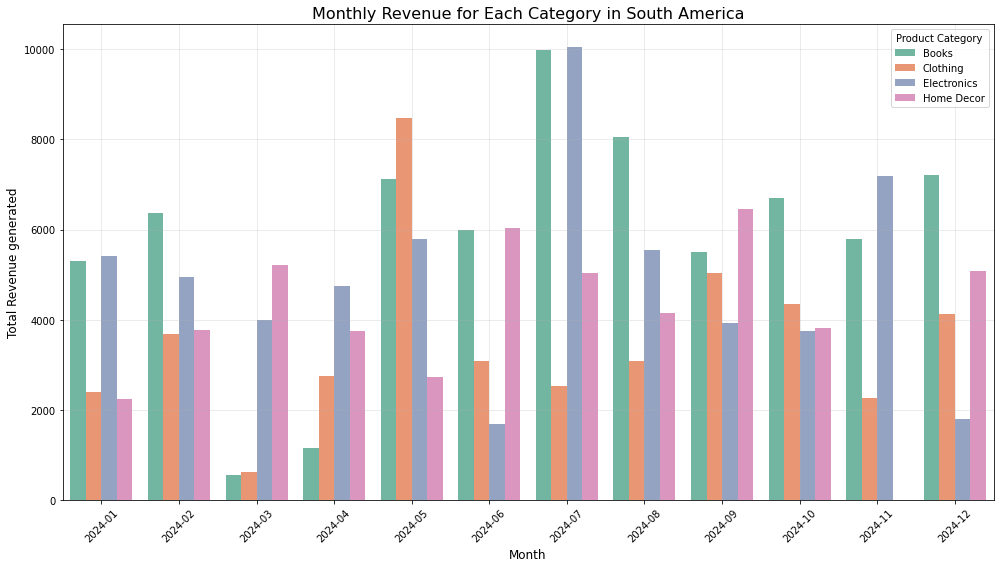

In [37]:
monthly_sales_category = prod_merged_SA.groupby(['Month', 'Category'])['TotalValue'].sum().reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(data=monthly_sales_category, x='Month', y='TotalValue', hue='Category', palette='Set2')
plt.title(f"Monthly Revenue for Each Category in South America", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Revenue generated", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Product Category")
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()

## Europe

### Top performing product Categories in Europe region

In [39]:
prod_merged_Europe = Transaction_data.merge(products_data, on="ProductID", how="left")
prod_merged_Europe = prod_merged_Europe.merge(customer_data, on="CustomerID",how="left")
prod_merged_Europe = prod_merged_Europe[prod_merged_Europe["Region"] == "Europe"]
products_Europe = prod_merged_Europe.groupby('Category')['TotalValue'].sum().sort_values(ascending=False).head(7)
print(products_Europe)
print("Total Revenue :: "+str(prod_merged_Europe["TotalValue"].sum()))

Category
Books          47464.42
Electronics    41562.60
Home Decor     40892.02
Clothing       36335.59
Name: TotalValue, dtype: float64
Total Revenue :: 166254.63


In [63]:
prod_merged_Europe.groupby(['Category'])['Quantity'].sum()

Category
Books          165
Clothing       119
Electronics    144
Home Decor     167
Name: Quantity, dtype: int64

['Electronics' 'Clothing' 'Books' 'Home Decor']


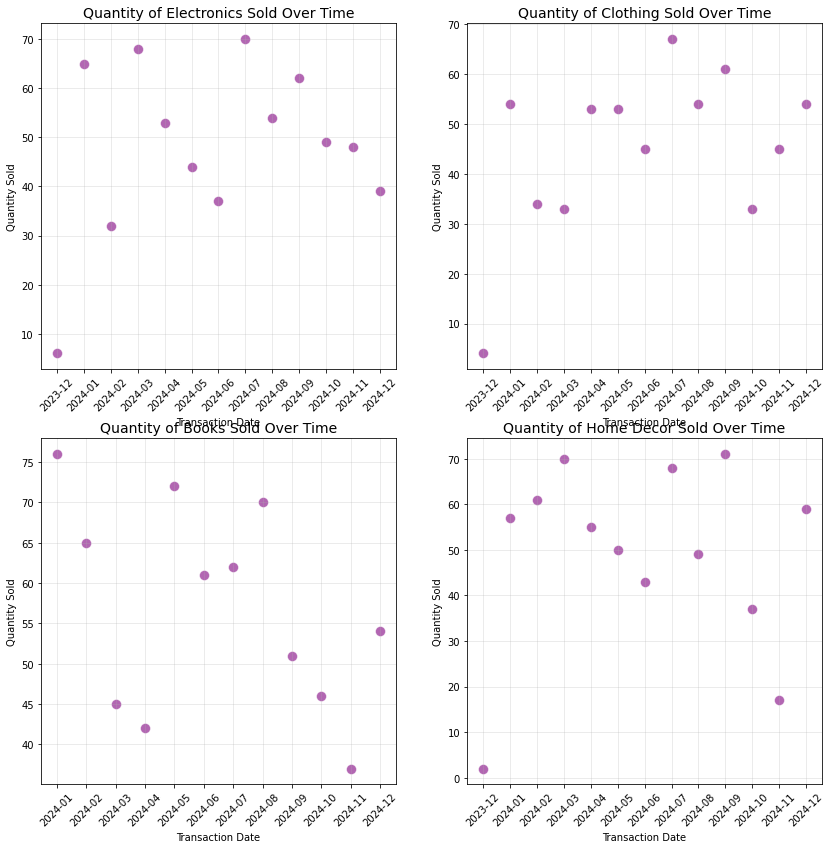

In [47]:
catagories = prod_merged_Europe['Category'].unique()
print(catagories)
prod_merged_Europe['Month'] = prod_merged_asia['TransactionDate'].dt.to_period('M').astype('str')
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(14,14))
axes = axes.flatten()
for i in range(len(catagories)):
    data = prod_merged[prod_merged['Category'] == catagories[i]]
    date = data.groupby('Month')['Quantity'].sum().reset_index()

    sns.scatterplot(x='Month', y='Quantity',data = date, ax=axes[i], color='purple', s=100, alpha=0.6)
    axes[i].set_title(f"Quantity of {catagories[i]} Sold Over Time", fontsize=14)
    axes[i].set_xlabel("Transaction Date", fontsize=10)
    axes[i].set_ylabel("Quantity Sold", fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(alpha=0.3)


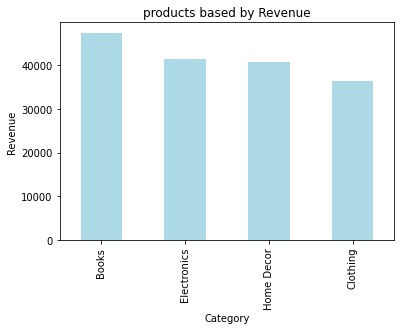

In [41]:
products_Europe.plot(kind='bar',title="products based by Revenue", color='lightblue')
plt.ylabel("Revenue")
plt.show()

### Monthly Revenue Trend

In [48]:
time_data_Europe = prod_merged_Europe
time_data_Europe['Month'] = prod_merged_Europe['TransactionDate'].dt.to_period('M')
revenue_month_Europe = time_data_Europe.groupby('Month')['TotalValue'].sum()
print(revenue_month_Europe)

Month
2023-12     1272.72
2024-01    19287.27
2024-02    10442.93
2024-03    12553.90
2024-04    11775.14
2024-05    16740.50
2024-06    14070.84
2024-07    11529.86
2024-08    15058.21
2024-09    19084.72
2024-10     9101.74
2024-11     7780.79
2024-12    17556.01
Freq: M, Name: TotalValue, dtype: float64


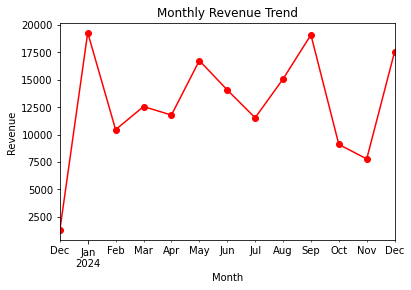

In [49]:
revenue_month_Europe.plot(title='Monthly Revenue Trend', marker = 'o', color ="red")
plt.ylabel("Revenue")
plt.show()

### Monthly Revenue Trends of different catagories

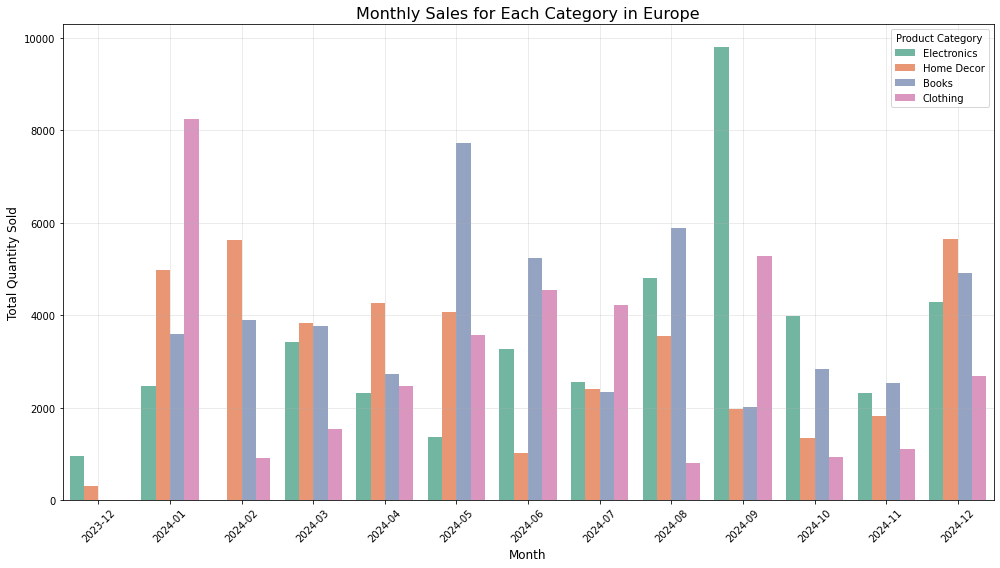

In [50]:
monthly_sales_category = prod_merged_Europe.groupby(['Month', 'Category'])['TotalValue'].sum().reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(data=monthly_sales_category, x='Month', y='TotalValue', hue='Category', palette='Set2')
plt.title(f"Monthly Sales for Each Category in Europe", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Quantity Sold", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Product Category")
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()

## North America

### Top performing product Categories in North America region

In [51]:
prod_merged_NA = Transaction_data.merge(products_data, on="ProductID", how="left")
prod_merged_NA = prod_merged_NA.merge(customer_data, on="CustomerID",how="left")
prod_merged_NA = prod_merged_NA[prod_merged_NA["Region"] == "North America"]
products_NA = prod_merged_NA.groupby('Category')['TotalValue'].sum().sort_values(ascending=False).head(7)
print(products_NA)
print("Total Revenue :: "+str(prod_merged_NA["TotalValue"].sum()))

Category
Electronics    44716.43
Books          41811.99
Clothing       38038.49
Home Decor     27746.49
Name: TotalValue, dtype: float64
Total Revenue :: 152313.40000000002


In [64]:
prod_merged_NA.groupby(['Category'])['Quantity'].sum()

Category
Books          155
Clothing       147
Electronics    153
Home Decor     138
Name: Quantity, dtype: int64

['Electronics' 'Clothing' 'Books' 'Home Decor']


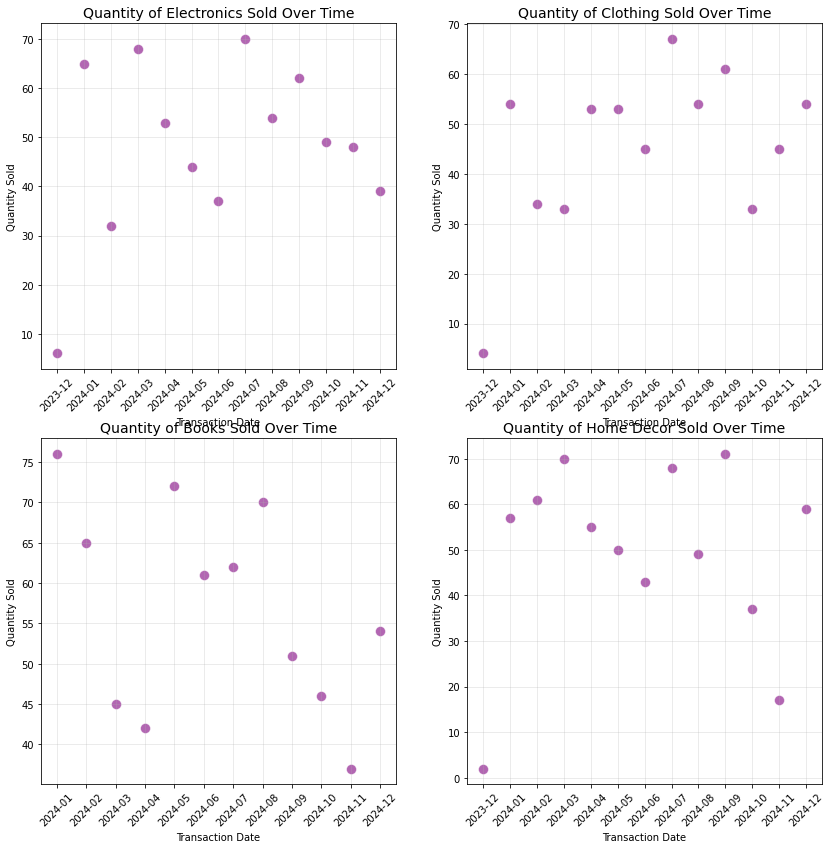

In [56]:
catagories = prod_merged_NA['Category'].unique()
print(catagories)
prod_merged_NA['Month'] = prod_merged_asia['TransactionDate'].dt.to_period('M').astype('str')
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(14,14))
axes = axes.flatten()
for i in range(len(catagories)):
    data = prod_merged[prod_merged['Category'] == catagories[i]]
    date = data.groupby('Month')['Quantity'].sum().reset_index()

    sns.scatterplot(x='Month', y='Quantity',data = date, ax=axes[i], color='purple', s=100, alpha=0.6)
    axes[i].set_title(f"Quantity of {catagories[i]} Sold Over Time", fontsize=14)
    axes[i].set_xlabel("Transaction Date", fontsize=10)
    axes[i].set_ylabel("Quantity Sold", fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(alpha=0.3)


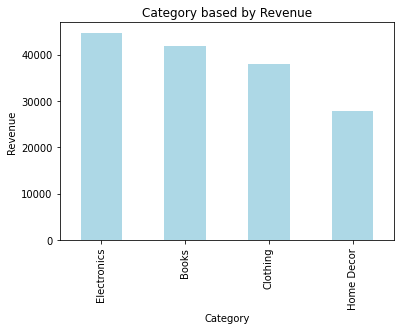

In [52]:
products_NA.plot(kind='bar',title="Category based by Revenue", color='lightblue')
plt.ylabel("Revenue")
plt.show()

### Monthly Revenue Trend

In [53]:
time_data_NA = prod_merged_NA
time_data_NA['Month'] = prod_merged_NA['TransactionDate'].dt.to_period('M')
revenue_month_NA = time_data_NA.groupby('Month')['TotalValue'].sum()
print(revenue_month_NA)

Month
2023-12      911.44
2024-01    12277.27
2024-02    13286.83
2024-03    14974.31
2024-04    22969.02
2024-05    12238.16
2024-06     7644.90
2024-07    12477.97
2024-08    12309.98
2024-09    15942.25
2024-10     9280.58
2024-11     7649.94
2024-12    10350.75
Freq: M, Name: TotalValue, dtype: float64


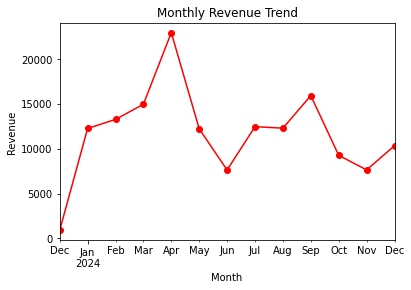

In [54]:
revenue_month_NA.plot(title='Monthly Revenue Trend', marker = 'o', color ="red")
plt.ylabel("Revenue")
plt.show()

### Monthly sales Trends of different catagories

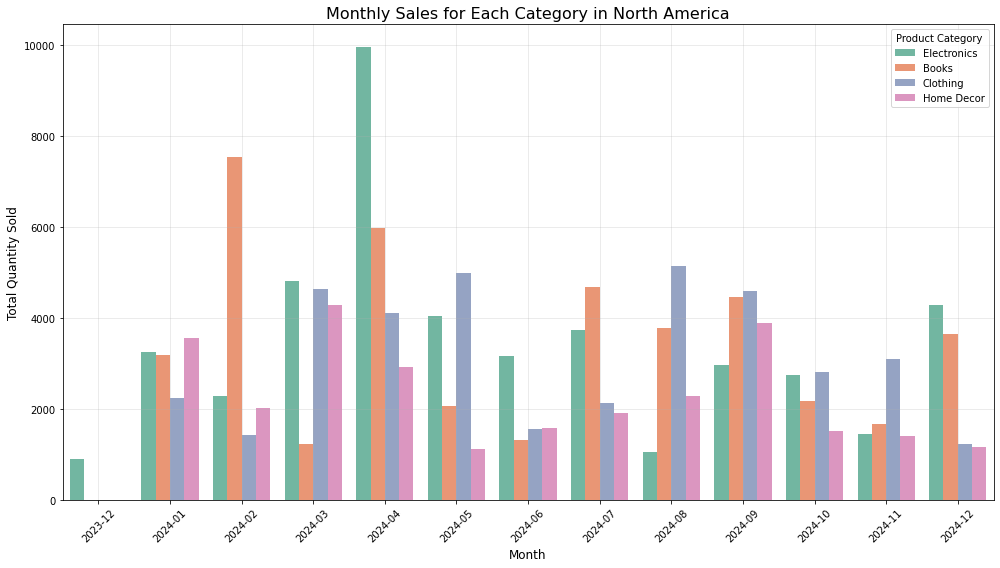

In [55]:
monthly_sales_category = prod_merged_NA.groupby(['Month', 'Category'])['TotalValue'].sum().reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(data=monthly_sales_category, x='Month', y='TotalValue', hue='Category', palette='Set2')
plt.title(f"Monthly Sales for Each Category in North America", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Quantity Sold", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Product Category")
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()